In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("data/glass.csv")
df.rename(columns={'Type of glass': 'Type'}, inplace=True)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [32]:
df["Type"].unique()

array([1, 2, 3, 5, 6, 7])

In [33]:
df["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [54]:
Si = df["Si"].values
Si

array([71.78, 72.73, 72.99, 72.61, 73.08, 72.97, 73.09, 73.24, 72.08,
       72.99, 73.2 , 73.01, 73.28, 73.21, 73.29, 73.24, 73.11, 71.36,
       72.12, 72.73, 72.75, 72.02, 72.79, 73.02, 72.85, 73.  , 72.64,
       73.04, 73.15, 72.86, 73.08, 73.27, 72.97, 73.39, 72.95, 72.74,
       71.81, 72.96, 71.77, 71.77, 73.03, 73.2 , 72.76, 71.76, 72.95,
       71.95, 72.72, 71.57, 71.99, 72.08, 71.75, 72.36, 72.84, 72.85,
       72.98, 73.7 , 72.98, 72.95, 72.99, 72.79, 72.64, 71.72, 71.79,
       71.35, 72.01, 71.96, 72.22, 72.32, 72.2 , 71.99, 71.87, 71.96,
       73.1 , 72.87, 73.11, 73.12, 72.39, 72.83, 72.88, 72.86, 72.66,
       73.17, 72.81, 72.87, 72.28, 72.72, 73.25, 72.65, 72.89, 73.23,
       72.28, 73.06, 73.26, 73.1 , 73.28, 72.26, 72.34, 73.55, 73.21,
       72.92, 73.27, 72.87, 73.81, 70.57, 71.15, 72.19, 69.81, 70.16,
       72.67, 74.45, 73.21, 73.08, 72.02, 72.55, 72.44, 72.38, 72.33,
       72.06, 72.53, 72.45, 72.4 , 72.96, 72.84, 72.52, 72.75, 72.51,
       72.75, 71.99,

Text(0.5, 0, 'Si')

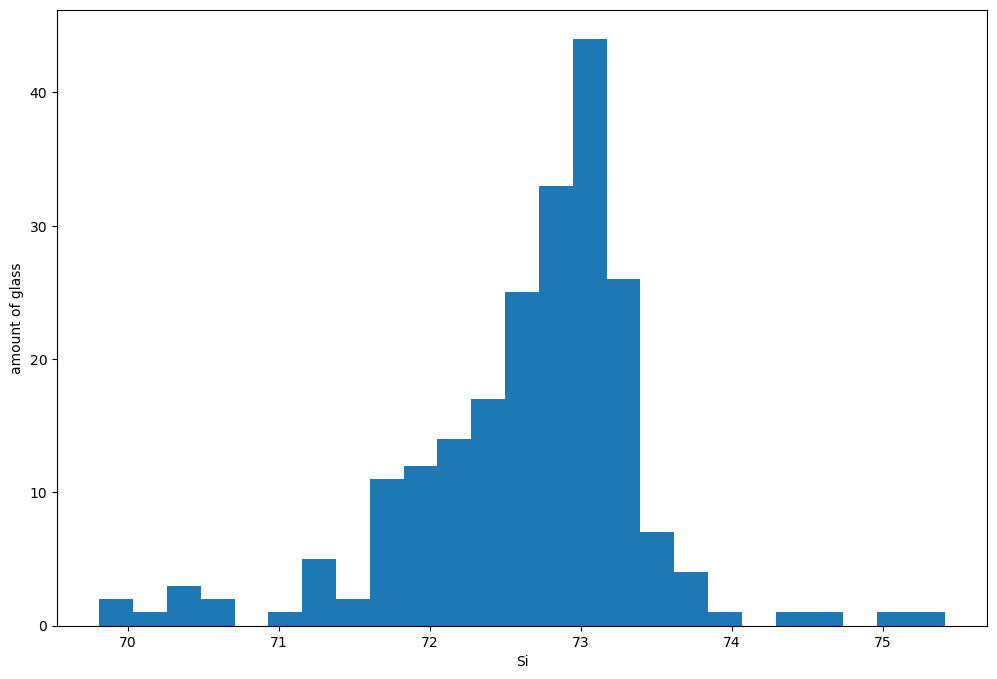

In [55]:
fig, ax = plt.subplots(figsize=(12,8)) 
number_of_bins = 25
#Plot histogram
h = ax.hist(Si, bins=number_of_bins)
ax.set_ylabel("amount of glass")
ax.set_xlabel("Si")

In [56]:
types = df["Type"].unique()
np.linspace(0,1,len(types))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [57]:
from matplotlib import colormaps
colors = colormaps['tab20']
colors_list = [colors(i) for i in np.linspace(0,1,10)]
colors_dict = {types[i]:colors_list[i] for i in range(len(types))}

Text(0, 0.5, 'Si')

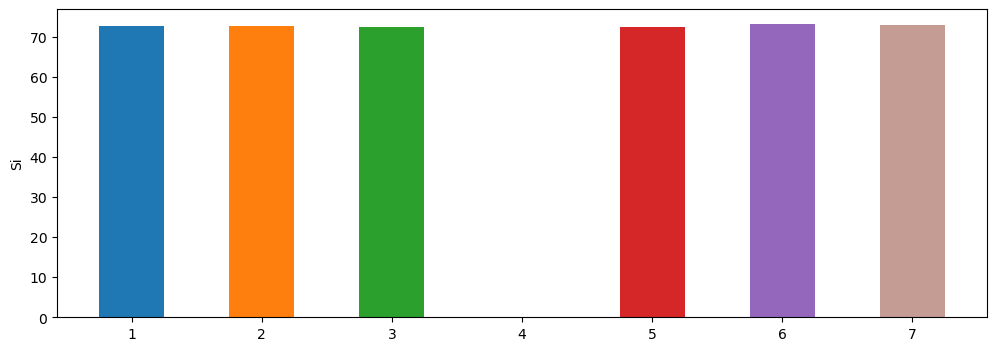

In [60]:
grouped = df.groupby("Type")
mean_tempos = grouped.mean()["Si"]
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(types,mean_tempos,0.5,color=colors_list)
ax.set_ylabel("Si")

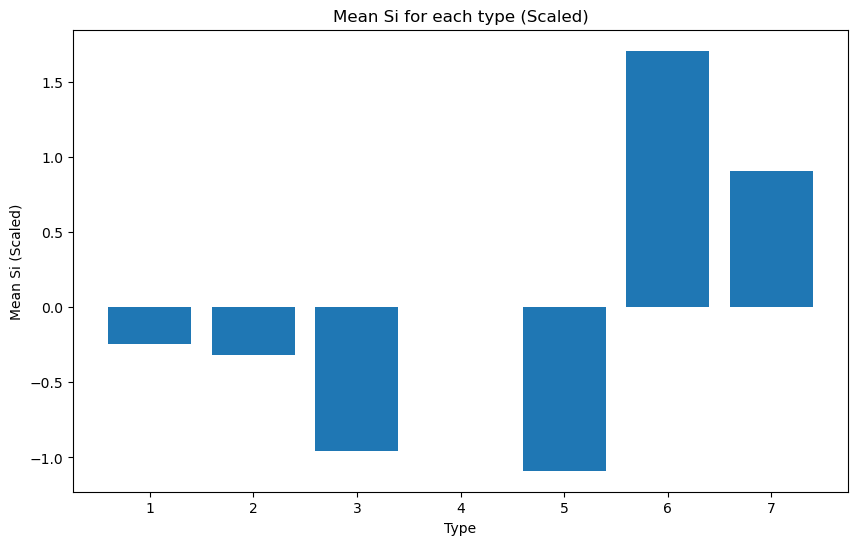

In [59]:
from sklearn.preprocessing import StandardScaler
grouped = df.groupby("Type")["Si"].mean()

# 使用 StandardScaler 对 "RI" 列的值进行标准化
scaler = StandardScaler()
grouped_scaled = scaler.fit_transform(grouped.values.reshape(-1, 1))

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped_scaled.flatten())
plt.xlabel("Type")
plt.ylabel("Mean Si (Scaled)")
plt.title("Mean Si for each type (Scaled)")
plt.show()